In [ ]:
# Cell 1: Install necessary packages
!pip install tensorflow kaggle

In [ ]:
# Import tensorflow
!pip install tensorflow==2.12.0

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Import libraries
import os
from zipfile import ZipFile
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [4]:
# Set random seeds for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

In [5]:
# Download the dataset using Kaggle API
!kaggle datasets download -d yessicatuteja/skycity-the-city-landscape-dataset

Dataset URL: https://www.kaggle.com/datasets/yessicatuteja/skycity-the-city-landscape-dataset
License(s): CC0-1.0
skycity-the-city-landscape-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# Define the extraction directory
extract_to = r'C:\Users\USUARIO\Documents\UCL\Summer'

# Create the directory if it doesn't exist
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Unzip the dataset
zip_path = 'skycity-the-city-landscape-dataset.zip'
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete. Files are extracted to:", extract_to)

Extraction complete. Files are extracted to: C:\Users\USUARIO\Documents\UCL\Summer


In [7]:
# Define the directory containing the dataset
dataset_dir = r'C:\Users\USUARIO\Documents\UCL\Summer\Cityscape Dataset'

In [8]:
# List the categories by reading the directory names
categories = {category: os.path.join(dataset_dir, category) for category in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, category))}

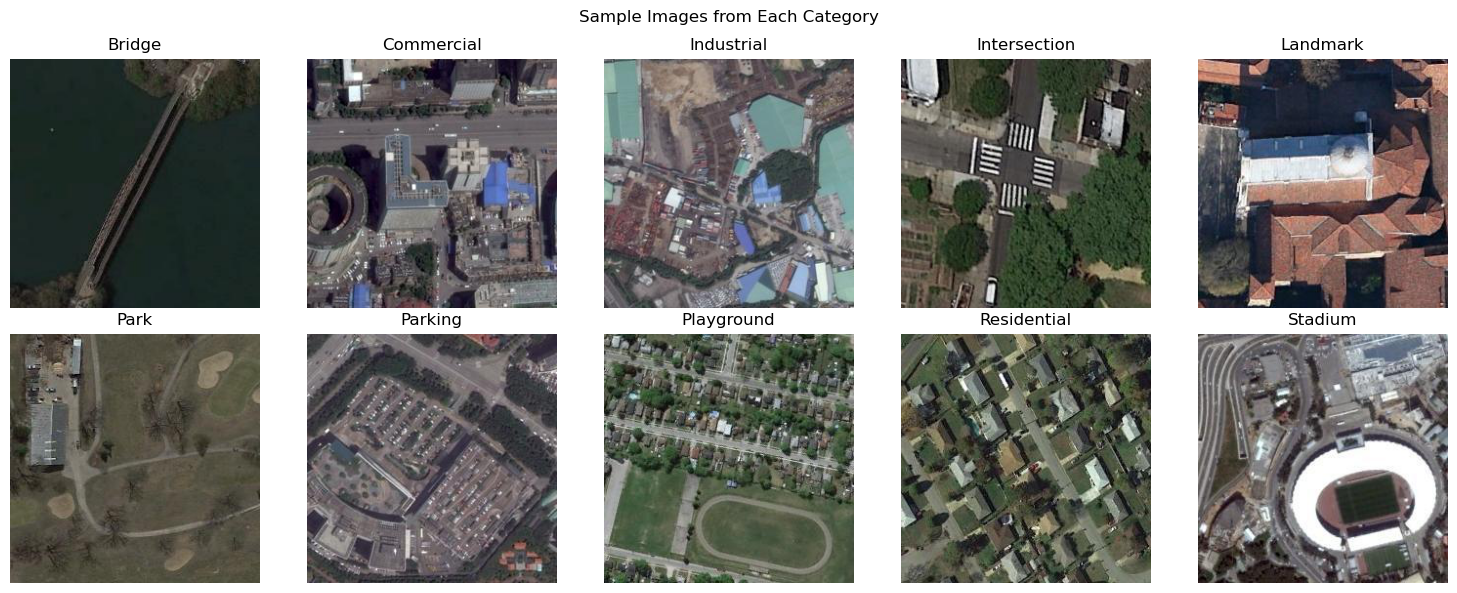

In [9]:
# Display Sample Images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Sample Images from Each Category')
axs = axs.ravel()

for idx, (category, path) in enumerate(categories.items()):
    # Ensure the directory exists and is not empty
    if os.path.exists(path) and os.listdir(path):
        sample_image_path = os.path.join(path, os.listdir(path)[0])
        img = Image.open(sample_image_path)
        axs[idx].imshow(img)
        axs[idx].set_title(category)
        axs[idx].axis('off')
    else:
        axs[idx].text(0.5, 0.5, 'No Images Available', horizontalalignment='center', verticalalignment='center')
        axs[idx].set_title(category)
        axs[idx].axis('off')

plt.tight_layout()
plt.show()

In [10]:
# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [11]:
image_size = (224, 224)
batch_size = 32

In [12]:
# Prepare training and validation sets
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 6400 images belonging to 10 classes.
Found 1600 images belonging to 10 classes.


In [13]:
# Define the model
from tensorflow.keras.optimizers import Adam
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model_cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train the q
history_cnn = model_cnn.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    verbose=1
)

val_loss_cnn, val_acc_cnn = model_cnn.evaluate(validation_generator)
print(f"CNN - Validation Loss: {val_loss_cnn}, Validation Accuracy: {val_acc_cnn}")


Epoch 1/25
200/200 [==============================] - 1066s 5s/step - loss: 2.3940 - accuracy: 0.1398 - val_loss: 2.1155 - val_accuracy: 0.1875
Epoch 2/25
200/200 [==============================] - 1034s 5s/step - loss: 2.0728 - accuracy: 0.2425 - val_loss: 1.9750 - val_accuracy: 0.2700
Epoch 3/25
200/200 [==============================] - 1014s 5s/step - loss: 1.8539 - accuracy: 0.3300 - val_loss: 1.6628 - val_accuracy: 0.4038
Epoch 4/25
200/200 [==============================] - 1002s 5s/step - loss: 1.6186 - accuracy: 0.4189 - val_loss: 1.5204 - val_accuracy: 0.4775
Epoch 5/25
200/200 [==============================] - 1013s 5s/step - loss: 1.4828 - accuracy: 0.4761 - val_loss: 1.4608 - val_accuracy: 0.4688
Epoch 6/25
200/200 [==============================] - 1106s 6s/step - loss: 1.3697 - accuracy: 0.5070 - val_loss: 1.2911 - val_accuracy: 0.5506
Epoch 7/25
200/200 [==============================] - 1108s 6s/step - loss: 1.2808 - accuracy: 0.5486 - val_loss: 1.2006 - val_accuracy:

In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
# Load the MobileNetV2 model with pre-trained weights
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

In [17]:
model_mobilenetv2 = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model_mobilenetv2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Continue training with early stopping
history_mobilenetv2 = model_mobilenetv2.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    verbose=1
)

val_loss_mobilenetv2, val_acc_mobilenetv2 = model_mobilenetv2.evaluate(validation_generator)
print(f"MobileNetV2 - Validation Loss: {val_loss_mobilenetv2}, Validation Accuracy: {val_acc_mobilenetv2}")

Epoch 1/25
200/200 [==============================] - 733s 4s/step - loss: 0.9572 - accuracy: 0.6842 - val_loss: 0.5705 - val_accuracy: 0.7931
Epoch 2/25
200/200 [==============================] - 719s 4s/step - loss: 0.6276 - accuracy: 0.7922 - val_loss: 0.5175 - val_accuracy: 0.8144
Epoch 3/25
200/200 [==============================] - 721s 4s/step - loss: 0.5339 - accuracy: 0.8192 - val_loss: 0.4841 - val_accuracy: 0.8338
Epoch 4/25
200/200 [==============================] - 720s 4s/step - loss: 0.5090 - accuracy: 0.8270 - val_loss: 0.4973 - val_accuracy: 0.8150
Epoch 5/25
200/200 [==============================] - 721s 4s/step - loss: 0.5113 - accuracy: 0.8313 - val_loss: 0.4729 - val_accuracy: 0.8275
Epoch 6/25
200/200 [==============================] - 721s 4s/step - loss: 0.4791 - accuracy: 0.8381 - val_loss: 0.4584 - val_accuracy: 0.8388
Epoch 7/25
200/200 [==============================] - 723s 4s/step - loss: 0.4477 - accuracy: 0.8480 - val_loss: 0.4339 - val_accuracy: 0.8494

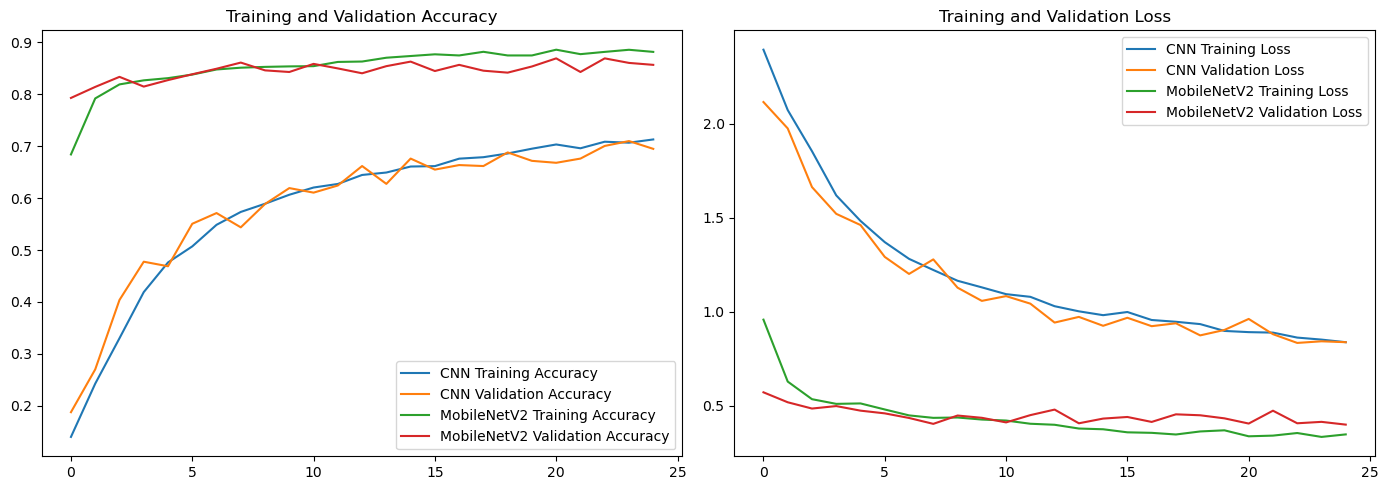

In [19]:
epochs = range(len(history_cnn.history['loss']))

plt.figure(figsize=(14, 5))

# Plot training and validation accuracy for both models
plt.subplot(1, 2, 1)
plt.plot(epochs, history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(epochs, history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(epochs, history_mobilenetv2.history['accuracy'], label='MobileNetV2 Training Accuracy')
plt.plot(epochs, history_mobilenetv2.history['val_accuracy'], label='MobileNetV2 Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss for both models
plt.subplot(1, 2, 2)
plt.plot(epochs, history_cnn.history['loss'], label='CNN Training Loss')
plt.plot(epochs, history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.plot(epochs, history_mobilenetv2.history['loss'], label='MobileNetV2 Training Loss')
plt.plot(epochs, history_mobilenetv2.history['val_loss'], label='MobileNetV2 Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
